In [42]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import evaluation as eval
import simulation as sim
import reconstruction as reco
import offset_analysis as a

In [64]:
n_offsets = 50
n_inputs = 13
#input_dir = "C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/050224_50_200k@200k_yz_6/"
input_dir = "E:/MPhys Large Files/080224_50_200k@200k_yz_13_1/"

offsets_x = np.loadtxt(input_dir + "offsets_x.csv", delimiter = ",")[:,1:7]
offsets_y = np.loadtxt(input_dir + "offsets_y.csv", delimiter = ",")[:,1:7]
offsets_z = np.loadtxt(input_dir + "offsets_z.csv", delimiter = ",")[:,1:7]

rotations_x = np.loadtxt(input_dir + "rotations_x.csv", delimiter = ",")[:,1:7]
rotations_y = np.loadtxt(input_dir + "rotations_y.csv", delimiter = ",")[:,1:7]
rotations_z = np.loadtxt(input_dir + "rotations_z.csv", delimiter = ",")[:,1:7]

truth_parameters = np.array(np.array([rotations_x[0:n_offsets], rotations_y[0:n_offsets], rotations_z[0:n_offsets], offsets_x[0:n_offsets], offsets_y[0:n_offsets], offsets_z[0:n_offsets]])).transpose((1,2,0))

OSError: [Errno 22] Invalid argument

In [3]:
i = 1
parameters_i, sum_of_residuals_squared_i, sum_of_no_squared_i, df_i, df_offsets_i = eval.Analyse_Run(input_dir, i, n_inputs, 
                                                                        offsets_x = offsets_x[i], offsets_y = offsets_y[i], offsets_z = offsets_z[i], 
                                                                        rotations_x = rotations_x[i], rotations_y = rotations_y[i], rotations_z = rotations_z[i],
                                                                        initial_guess = np.array([0.0,0.0,0.0,0.1,0.1,-0.1]),
                                                                        bounds = [(0, 0),(0, 0),(0, 0),(0, 0),(-1, 1),(-1, 1)],
                                                                        reprop = False)

Truth transformation parameters:  [0. 0. 0. 0. 0. 0.]
Optimal transformation parameters: [ 0.         0.         0.         0.        -0.0004838  0.0045841]
Sum of squares of residuals: 34125.91811278728
Sum of squares of residuals (no transform): 34136.10851157408


Truth transformation parameters:  [0. 0. 0. 0. 0. 0.]
Optimal transformation parameters: [ 0.          0.          0.          0.         -0.00018935 -0.00014016]
Sum of squares of residuals: 35437.35733727951
Sum of squares of residuals (no transform): 35437.38202266855


Truth transformation parameters:  [0.   0.   0.   0.   0.05 0.  ]
HIGH PX RES
Optimal transformation parameters: [ 0.          0.          0.          0.          0.03071719 -0.00047087]
Sum of squares of residuals: 8449.788881277793
Sum of squares of residuals (no transform): 8518.185787078612


[ 0.          0.          0.          0.          0.03071719 -0.00047087]
Truth transformation parameters:  [0.   0.   0.   0.   0.05 0.  ]
HIGH PX RES
Optimal 

In [60]:
parameters, sum_of_residuals_squared, sum_of_no_squared, df, df_offsets = eval.Analyse_Multiple_Runs(input_dir, n_offsets, n_inputs,
                                                                              offsets_x = offsets_x, offsets_y = offsets_y, offsets_z = offsets_z, 
                                                                              rotations_x = rotations_x, rotations_y = rotations_y, rotations_z = rotations_z,
                                                                              initial_guess = np.array([0.0,0.0,0.0,0.0,0.1,-0.1]),
                                                                              bounds = [(0, 0),(0, 0),(0, 0),(0, 0),(-1, 1),(-1, 1)],
                                                                              reprop=False)


ANALYSING DATAFRAME: 0

Truth transformation parameters:  [ 0.          0.          0.          0.          0.00034785 -0.00457323]
Optimal transformation parameters: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.25005639e-04  2.37810393e-05]
Sum of squares of residuals: 34125.89168779697
Sum of squares of residuals (no transform): 34125.89833523829


Truth transformation parameters:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.14680270e-05  2.03198106e-04]
Optimal transformation parameters: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.40146670e-04  8.64066726e-05]
Sum of squares of residuals: 35437.470588036675
Sum of squares of residuals (no transform): 35437.50092282011


Truth transformation parameters:  [0.         0.         0.         0.         0.01327152 0.00056089]
HIGH PX RES
Optimal transformation parameters: [0.         0.         0.         0.         0.00633261 0.00029621]
Sum of squares of residual

In [61]:
new_offsets_y = np.append(np.zeros((n_offsets,1)),truth_parameters[:,:,4]-parameters[:,:,4], axis = 1)
new_offsets_z = np.append(np.zeros((n_offsets,1)),truth_parameters[:,:,5]-parameters[:,:,5], axis = 1)

In [46]:
pred_offsets_y = np.append(np.zeros((n_offsets,1)),parameters[:,:,4], axis = 1)
pred_offsets_z = np.append(np.zeros((n_offsets,1)),parameters[:,:,5], axis = 1)

In [63]:
np.savetxt(input_dir + "new_offsets_y.csv",new_offsets_y, delimiter = ",")
np.savetxt(input_dir + "new_offsets_z.csv",new_offsets_z, delimiter = ",")
np.savetxt(input_dir + "pred_offsets_y.csv",pred_offsets_y, delimiter = ",")
np.savetxt(input_dir + "pred_offsets_z.csv",pred_offsets_z, delimiter = ",")

In [ ]:
plt.plot(x = np.arange(0,5))

In [62]:
print(new_offsets_y[:,3:7])

[[ 0.00693891  0.00878258  0.01349718]
 [ 0.01616335  0.021083    0.02917673]
 [-0.0102671  -0.01485039 -0.01475071]
 [ 0.00239102  0.00177372  0.00567538]
 [ 0.01798175  0.02388433  0.03305962]
 [-0.00102864 -0.00272154  0.0001329 ]
 [ 0.00146236  0.00149374  0.00506079]
 [ 0.02045444  0.02849037  0.03772587]
 [-0.01232863 -0.01867346 -0.02064145]
 [ 0.0328631   0.04626044  0.06127162]
 [-0.01072771 -0.01529682 -0.01535312]
 [-0.0147734  -0.02206641 -0.02390775]
 [-0.00563254 -0.0083532  -0.00730843]
 [-0.00987622 -0.01441841 -0.01354559]
 [ 0.00606783  0.00696662  0.01249465]
 [ 0.01023975  0.01248077  0.0184719 ]
 [-0.02803678 -0.04012992 -0.04823502]
 [-0.00197825 -0.00167435  0.00115586]
 [-0.00217725 -0.0025475   0.00017809]
 [ 0.00906491  0.01127468  0.01630237]
 [-0.00078663 -0.00273654  0.00038998]
 [-0.01897218 -0.02688935 -0.03140177]
 [-0.00237008 -0.00229329  0.00057065]
 [-0.0079537  -0.01199139 -0.01122907]
 [ 0.01622573  0.0213366   0.02970784]
 [ 0.00268582  0.00125743

In [57]:
print(np.std(new_offsets_y[:,3:7]))

0.012674066950262644


In [13]:
offsets_y

array([[-0.03022096,  0.0006745 ,  0.00579822,  0.05348634,  0.01492527],
       [ 0.01491203, -0.05654248,  0.03692188,  0.01319371,  0.04993133],
       [ 0.07550643,  0.0342726 , -0.01760333, -0.04241002,  0.03689417],
       [ 0.04478376, -0.04161283,  0.01423444,  0.0877993 , -0.0478607 ],
       [-0.0235192 , -0.13039409,  0.0414451 , -0.05669293,  0.01200068],
       [-0.11514203,  0.0582786 ,  0.12937728, -0.10791169,  0.04593512],
       [ 0.0870709 , -0.01077017,  0.04217125, -0.08234246,  0.09118202],
       [-0.12252308, -0.12523782,  0.06630363,  0.03459369, -0.03574204],
       [ 0.13203127,  0.07301144,  0.15172631, -0.14204782,  0.10205804],
       [-0.02781336, -0.10174929,  0.04384771,  0.07845878,  0.09847667],
       [ 0.060177  , -0.00387722,  0.02321788, -0.10284062,  0.01896105],
       [ 0.05340283,  0.05983939, -0.04458242, -0.06446463,  0.02334039],
       [ 0.14247453, -0.01460203, -0.0095771 ,  0.16738234, -0.08550428],
       [-0.03906767,  0.02295746, -0.0

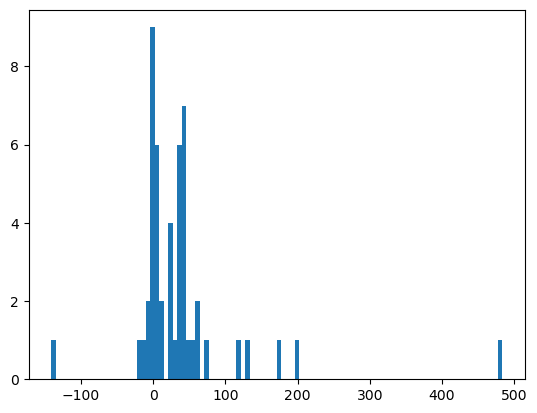

24.79688695795132
20.0


In [54]:
perc_accounted = (parameters[:,:,4]/offsets_y).flatten()
plt.hist((perc_accounted).flatten()*100, bins = 100)
plt.show()
print(np.median((perc_accounted).flatten()*100))
print((len(perc_accounted[(perc_accounted < 0) | (perc_accounted > 2)])/len(perc_accounted))*100)

In [39]:
len(perc_accounted[perc_accounted < 0])

20

In [38]:
len(perc_accounted)

50

In [ ]:
np.savetxt(input_dir + "pred_offsets_y.csv", np.append(np.zeros((50,1)),parameters[:,:,4], axis = 1), delimiter = ",")
np.savetxt(input_dir + "pred_offsets_z.csv", np.append(np.zeros((50,1)),parameters[:,:,5], axis = 1), delimiter = ",")

np.savetxt(input_dir + "new_offsets_y.csv", np.append(np.zeros((50,1)),truth_parameters[:,:,4]-parameters[:,:,4], axis = 1), delimiter = ",")
np.savetxt(input_dir + "new_offsets_z.csv", np.append(np.zeros((50,1)),truth_parameters[:,:,5]-parameters[:,:,5], axis = 1), delimiter = ",")

In [6]:
method_1 = (truth_parameters[:,2:5,4]-parameters[:,:,0,4]).flatten()
method_2 = (truth_parameters[:,2:5,4]-parameters[:,:,1,4]).flatten()
method_3 = (truth_parameters[:,2:5,4]-parameters[:,:,2,4]).flatten()
method_4 = (truth_parameters[:,2:5,4]-parameters[:,:,3,4]).flatten()
method_5 = (truth_parameters[:,2:5,4]-parameters[:,:,4,4]).flatten()
method_6 = (truth_parameters[:,2:5,4]-parameters[:,:,5,4]).flatten()

In [15]:
np.std(truth_parameters[:,2:5,4])

0.0698827973842435

In [105]:
res_dist = np.mean(method_2, axis = 1)
offset_mean = np.mean(truth_parameters[:,2:5,4], axis = 1)

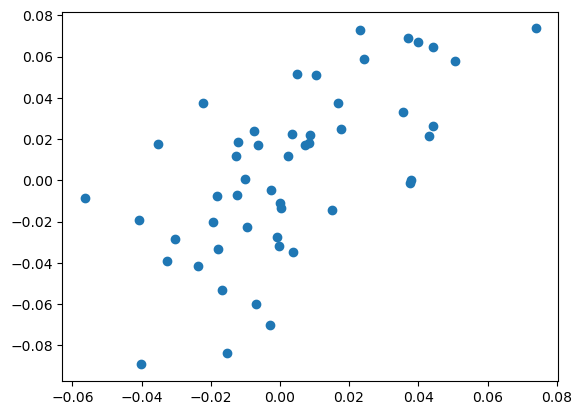

array([[1.        , 0.63828875],
       [0.63828875, 1.        ]])

In [106]:
plt.scatter(res_dist, offset_mean)
plt.show()
np.corrcoef(res_dist, offset_mean)

In [7]:
np.std([method_1,method_2,method_3,method_4,method_5,method_6],axis=1)

array([0.04771098, 0.02314402, 0.03865976, 0.03910297, 0.02896707,
       0.0301405 ])

In [19]:
np.sum(np.abs(truth_parameters[:,2:5,4]))

8.23321937216822

In [8]:
np.sum(np.abs([method_1,method_2,method_3,method_4,method_5,method_6]),axis=1)

array([5.4713929 , 2.68573699, 4.73161361, 4.80986346, 3.53110369,
       3.66407711])

In [9]:
np.max(np.abs([method_1,method_2,method_3,method_4,method_5,method_6]),axis=1)

array([0.1468541 , 0.08780383, 0.10756945, 0.08467278, 0.08541293,
       0.09768664])

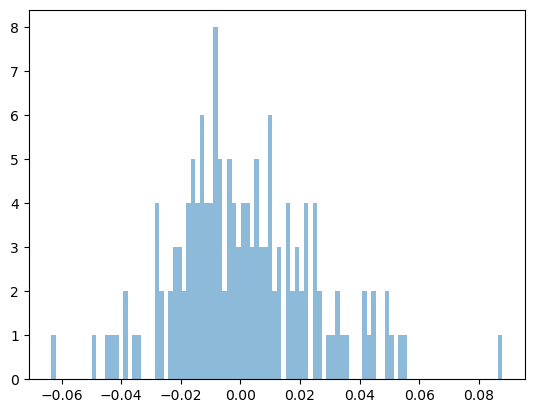

In [10]:
#plt.hist(method_1, alpha = 0.5, bins = 100)
plt.hist(method_2, alpha = 0.5, bins = 100)
#plt.hist(method_3, alpha = 0.5, bins = 100)
#plt.hist(method_4, alpha = 0.5, bins = 100)
#plt.hist(method_5, alpha = 0.5, bins = 100)
#plt.hist(method_6, alpha = 0.5, bins = 100)
plt.show()

In [34]:
truth_parameters[0:2,2:5,4]-parameters[0,:,:,4]

ValueError: operands could not be broadcast together with shapes (2,3) (3,6) 

In [38]:
truth_parameters[0:2,2:5,4]

array([[0.00579822, 0.05348634, 0.01492527],
       [0.03692188, 0.01319371, 0.04993133]])

In [37]:
parameters[:,:,0,4]

array([[-0.02502789,  0.02114473, -0.02073235],
       [-0.0188879 , -0.04590286, -0.01391031]])

In [29]:
parameters[0,:,0,4]

array([-0.02502789,  0.02114473, -0.02073235])

In [11]:
parameters_i[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.19192096,
        -0.01508929],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.16030338,
        -0.01336093],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.15246435,
        -0.01195861],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.10917367,
         0.03238844],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.13473852,
         0.00951375],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.15638386,
        -0.01265977]])

In [9]:
parameters[0]

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.02502789, -0.01984256],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.0074733 , -0.01976561],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.02240255, -0.02078434],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.01600389, -0.03071063],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.01173859, -0.02523812],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
         -0.01493792, -0.02027498]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.02114473,  0.05751803],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.03747356,  0.05802581],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.02542621,  0.055708  ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.02967621,  0.04531012],
        [ 0.        ,  0.   

In [115]:
df_i

,Unnamed: 0,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,...,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1,PX_RES,PY_RES
0,0,-0.006850,0.003543,1.564355,145.982010,0.940361,-1.0,145.633667,-1.0,145.629730,...,261.293457,258.252228,325.957428,322.723419,319.490509,264.568268,261.341675,258.118439,-0.002392,-0.004489
1,1,-0.000889,-0.000891,1.570482,1124.976074,0.353727,-1.0,1134.860840,-1.0,1134.860352,...,143.656601,143.324631,146.695129,146.537842,146.380569,143.706604,143.549332,143.392090,0.008710,0.007848
2,2,-0.054986,-0.002876,1.559127,18.186310,0.212222,-1.0,18.160948,-1.0,18.159637,...,-462.059021,-467.718170,-345.035431,-350.935760,-356.835175,-456.152161,-461.978302,-467.792358,-0.001397,-0.000311
3,3,-0.001710,-0.003955,1.569513,584.869324,0.750530,-1.0,577.678711,-1.0,577.673706,...,207.150909,206.475876,219.783188,219.143188,218.503235,207.624908,206.984528,206.343552,-0.012447,-0.012891
4,4,-0.000329,0.001583,1.570216,3040.905762,1.765987,-1.0,2963.893311,-1.0,2963.889160,...,178.198303,177.958923,184.018158,183.727905,183.437637,178.503326,178.213028,177.922699,-0.025983,-0.026066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156709,156709,0.017521,0.008334,1.573437,57.073296,-0.150690,1.0,57.127689,1.0,57.125507,...,177.743210,178.815231,151.345139,152.660980,153.976120,176.318207,177.632126,178.946518,0.000952,0.000863
156710,156710,0.000853,-0.001533,1.570926,1172.015625,-0.152341,1.0,1177.087036,1.0,1177.085693,...,-82.416237,-82.248085,-83.586082,-83.521820,-83.457550,-82.364960,-82.300461,-82.235718,0.004309,0.007328
156711,156711,0.005016,-0.001533,1.569157,199.377472,0.326749,1.0,199.140976,1.0,199.140472,...,-221.940979,-222.782166,-205.589615,-206.410004,-207.230347,-221.169418,-221.988937,-222.808350,-0.001188,-0.001834
156712,156712,0.092253,-0.008958,1.583901,10.839717,-0.142042,1.0,10.875880,1.0,10.874511,...,156.549667,162.992249,25.055326,31.561075,38.097866,149.996353,156.520721,163.030884,0.003325,0.003046


In [9]:
df

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_4,LOCAL_Z_HIT_3,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1
0,-0.006850,0.003543,1.564354,145.982025,0.940414,-1.0,145.633667,-1.0,145.629730,0.514953,...,319.415009,264.534515,261.272217,258.252228,325.958221,322.725677,319.494049,264.584595,261.358124,258.134796
1,-0.000889,-0.000891,1.570482,1124.976074,0.353995,-1.0,1134.860840,-1.0,1134.860352,-1.009918,...,146.507492,143.717102,143.635361,143.324631,146.703384,146.546143,146.388901,143.715393,143.558105,143.400803
2,-0.054986,-0.002876,1.559127,18.186316,0.212224,-1.0,18.160948,-1.0,18.159637,-0.052293,...,-356.893829,-456.068451,-462.080261,-467.718170,-345.053741,-350.933319,-356.813690,-456.123474,-461.963196,-467.785553
3,-0.001710,-0.003955,1.569513,584.869324,0.750669,-1.0,577.678711,-1.0,577.673706,-2.283606,...,218.437332,207.488953,207.129669,206.475876,219.789490,219.149796,218.510101,207.635742,206.995453,206.354446
4,-0.000329,0.001583,1.570215,3040.905762,1.766712,-1.0,2963.893311,-1.0,2963.889160,4.691643,...,183.406189,178.702774,178.177078,177.958923,184.027359,183.737045,183.446716,178.511124,178.220734,177.930313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783560,0.017521,0.008334,1.573436,57.073296,-0.150670,1.0,57.127689,1.0,57.125507,0.476027,...,154.037704,176.406982,177.721985,178.815231,151.342148,152.662903,153.982056,176.336533,177.649170,178.962494
783561,0.000853,-0.001533,1.570926,1172.015625,-0.152061,1.0,1177.087036,1.0,1177.085693,-1.810304,...,-83.372749,-82.322609,-82.437469,-82.248085,-83.577667,-83.513374,-83.449089,-82.356339,-82.291870,-82.227211
783562,0.005016,-0.001533,1.569157,199.377472,0.326820,1.0,199.140976,1.0,199.140472,-0.305185,...,-207.256088,-221.172546,-221.962219,-222.782166,-205.587952,-206.407257,-207.226593,-221.153839,-221.973129,-222.792557
783563,0.092253,-0.008958,1.583901,10.839711,-0.142043,1.0,10.875880,1.0,10.874511,-0.097390,...,38.128437,150.080612,156.528427,162.992249,25.029589,31.561405,38.129196,150.036896,156.532104,163.029099


In [39]:
df_i = df

In [67]:
df_i["PX_RES"] = (df_i["PX_TRUTH"] - df_i["FIT_PX_1"])/df_i["PX_TRUTH"]
df_i["PY_RES"] = (df_i["PY_TRUTH"] - df_i["FIT_PY_1"])/df_i["PY_TRUTH"]

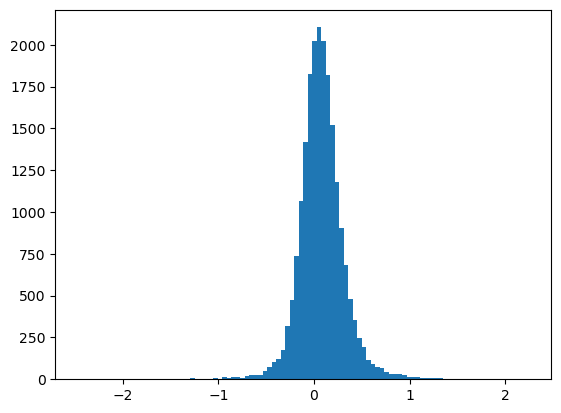

68.41283707586854
100.0
0.23778923734277635
-31.587162924131462


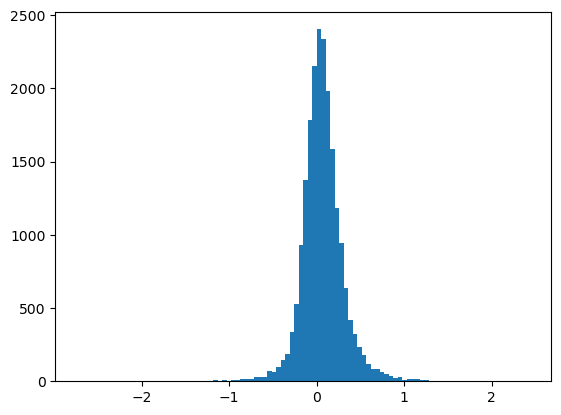

54.42443621217308
100.0
0.24575385983159573
-45.57556378782692


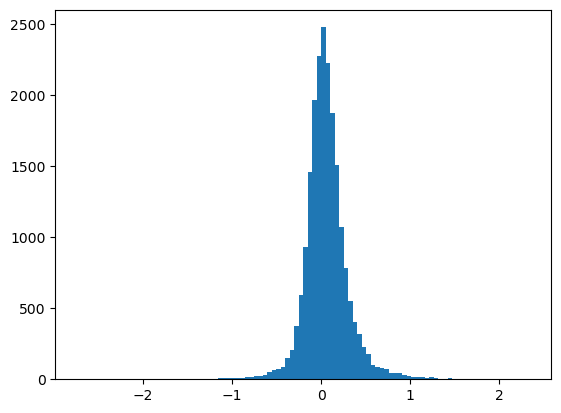

40.1698680081779
100.0
0.2533896759024957
-59.8301319918221


,Unnamed: 0,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,...,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1,PX_RES,PY_RES
0,92815,0.000891,0.000942,1.570487,1121.742920,0.346425,1.0,1121.845947,1.0,1121.845337,...,44.983700,44.885406,47.978756,47.825134,47.671494,45.059399,44.905510,44.751369,0.000092,0.001076
1,92816,0.005729,-0.000778,1.570355,174.547409,0.076981,1.0,174.711777,1.0,174.711700,...,-242.261841,-242.513168,-237.900757,-238.118576,-238.336746,-242.048096,-242.267273,-242.487213,0.000941,0.000138
2,92818,0.001602,-0.000166,1.571363,624.091858,-0.353788,1.0,624.466797,1.0,624.466675,...,-274.497009,-274.168549,-280.096405,-279.814514,-279.532623,-274.739532,-274.457092,-274.174133,0.000600,0.002448
3,92821,0.002138,-0.000768,1.569292,467.673767,0.703725,1.0,467.756012,1.0,467.755341,...,302.127563,301.239990,317.242126,316.486755,315.731445,302.893799,302.139526,301.386139,0.000176,0.000178
4,92823,0.127166,0.045132,1.576453,7.863762,-0.044484,1.0,7.863438,1.0,7.855307,...,-28.456125,-25.769457,-85.226303,-82.372429,-79.407608,-31.194338,-28.460592,-25.730040,-0.000041,-0.000131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20665,8641,-0.122916,-0.031853,1.551852,8.135655,0.154117,-1.0,8.127929,-1.0,8.122348,...,56.527412,46.941311,246.791946,237.161926,227.638489,66.024574,56.507473,46.973652,-0.000951,-0.000909
20666,61512,-0.056248,0.022618,1.568792,17.778364,0.035630,-1.0,17.775040,-1.0,17.770458,...,100.984505,99.810982,121.093803,120.061806,119.057129,101.951149,100.926117,99.891052,-0.000187,-0.000251
20667,50420,-0.090989,0.019115,1.577818,10.990316,-0.077171,-1.0,10.999695,-1.0,10.997415,...,-53.782528,-50.361229,-124.271400,-120.762856,-117.233536,-57.258148,-53.789871,-50.324112,0.000853,0.000803
20668,45749,-0.014676,-0.001742,1.571530,68.138329,-0.050023,-1.0,68.140030,-1.0,68.139908,...,-492.608887,-492.241852,-499.966858,-499.603790,-499.240051,-493.016541,-492.648285,-492.280060,0.000025,-0.000721


In [68]:
test_df = df_i[(np.abs(df_i["PX_RES"]) < 0.001)]#& (df_i["CHI2SUM"] < 25)]

if len(test_df[test_df["Q_FIT"] == 1]) > len(test_df[test_df["Q_FIT"] == -1]):
    test_df = pd.concat([test_df[test_df["Q_FIT"] == -1], test_df[test_df["Q_FIT"] == 1].sample(len(test_df[test_df["Q_FIT"] == -1]))], ignore_index = True)
else:
    test_df = pd.concat([test_df[test_df["Q_FIT"] == 1], test_df[test_df["Q_FIT"] == -1].sample(len(test_df[test_df["Q_FIT"] == 1]))], ignore_index = True)

PX, PY, PZ, DX, DY, DZ = sim.Propagate_B_Field(test_df["FIT_PX_1"],test_df["FIT_PY_1"], test_df["FIT_PZ_1"], -test_df["Q_FIT"], 1, 4000)
PX_T, PY_T, PZ_T, DX_T, DY_T, DZ_T = sim.Propagate_B_Field(test_df["PX_TRUTH"],test_df["PY_TRUTH"], test_df["PZ_TRUTH"], -test_df["Q_FIT"], 1, 4000)
test = test_df["LOCAL_Y_HIT_1"] + 3*test_df["FIT_PY_1"]/test_df["FIT_PX_1"]*500 + DY + 4000*PY/PX


plt.hist(test - test_df["LOCAL_Y_HIT_4"], bins = 100)
plt.show()
print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000)
print(truth_parameters[i][2][4]*1000)
print(np.std(test - test_df["LOCAL_Y_HIT_4"]))
print(np.median(test - test_df["LOCAL_Y_HIT_4"])*1000 - truth_parameters[i][2][4]*1000)

plt.hist(test + 500*PY/PX - test_df["LOCAL_Y_HIT_5"], bins = 100)
plt.show()
print(np.median(test+ 500*PY/PX - test_df["LOCAL_Y_HIT_5"])*1000)
print(truth_parameters[i][3][4]*1000)
print(np.std(test+ 500*PY/PX - test_df["LOCAL_Y_HIT_5"]))
print(np.median(test+ 500*PY/PX - test_df["LOCAL_Y_HIT_5"])*1000 - truth_parameters[i][3][4]*1000)

plt.hist(test + 1000*PY/PX - test_df["LOCAL_Y_HIT_6"], bins = 100)
plt.show()
print(np.median(test+ 1000*PY/PX - test_df["LOCAL_Y_HIT_6"])*1000)
print(truth_parameters[i][4][4]*1000)
print(np.std(test+ 1000*PY/PX - test_df["LOCAL_Y_HIT_6"]))
print(np.median(test+ 1000*PY/PX - test_df["LOCAL_Y_HIT_6"])*1000 - truth_parameters[i][4][4]*1000)

test_params = np.array([np.mean(test - test_df["LOCAL_Y_HIT_4"]), np.mean(test+ 500*PY/PX - test_df["LOCAL_Y_HIT_5"]), np.mean(test+ 1000*PY/PX - test_df["LOCAL_Y_HIT_6"])])
test_df

In [ ]:
np.mean(PY/PX)

In [53]:
np.mean(DY-DY_T+(PY/PX-PY_T/PX_T)*4000)*1000

1.9110300940819696

In [ ]:
test_df = test_df[(test - test_df["LOCAL_Y_HIT_4"] >= np.percentile(test - test_df["LOCAL_Y_HIT_4"], 1)) & (test - test_df["LOCAL_Y_HIT_4"] <= np.percentile(test - test_df["LOCAL_Y_HIT_4"], 99))]


In [220]:
data = (test - test_df["LOCAL_Y_HIT_4"]).values
data_80 = data[(data >= np.percentile(data, 1)) & (data <= np.percentile(data, 99))]
print(np.mean(data_80))
print(np.median(data))


0.1528771673978109
0.15198158312702503


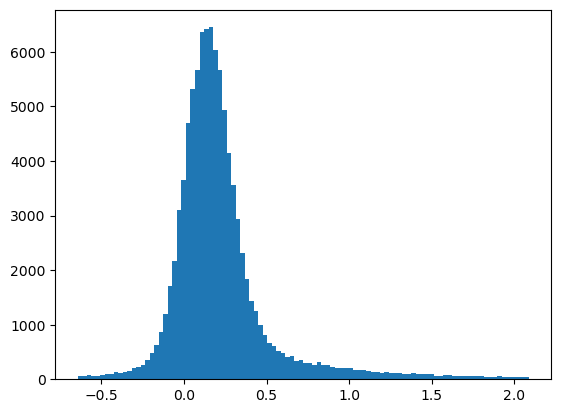

In [161]:
plt.hist(data_80, bins = 100)
plt.show()

In [280]:
print(np.mean(DY_T-DY))
print(np.mean(PY_T/PX_T - PY/PX)*4000)
print(np.mean(DY_T-DY+(PY_T/PX_T - PY/PX)*4000))
print(np.mean(truth_parameters[i,2:5,4]))

0.001944660212132003
0.007492704729810043
0.009437364941942045
0.0002314446346781407


In [117]:
truth_parameters[i,2:5,4]

array([ 0.17151438, -0.00878473, -0.00921902])

In [118]:
parameters_i[2:5,4]

array([ 0.1330995 , -0.0415322 , -0.04472461])

In [281]:
print(np.sum(np.abs(parameters_i[2:5,4]+np.mean(truth_parameters[i,2:5,4])-truth_parameters[i,2:5,4])))
print(np.sum(np.abs(parameters_i[2:5,4]+np.mean(DY_T-DY+(PY_T/PX_T - PY/PX)*4000)-truth_parameters[i,2:5,4])))
print(np.sum(np.abs(parameters_i[2:5,4]-truth_parameters[i,2:5,4])))

0.14732641121709447
0.11970865029530278
0.1480207451211289


In [282]:
print(np.sum(np.abs(test_params+np.mean(truth_parameters[i,2:5,4])-truth_parameters[i,2:5,4])))
print(np.sum(np.abs(test_params+np.mean(DY_T-DY+(PY_T/PX_T - PY/PX)*4000)-truth_parameters[i,2:5,4])))
print(np.sum(np.abs(test_params-truth_parameters[i,2:5,4])))

0.10541526705042514
0.07779750612863344
0.10610960095445957


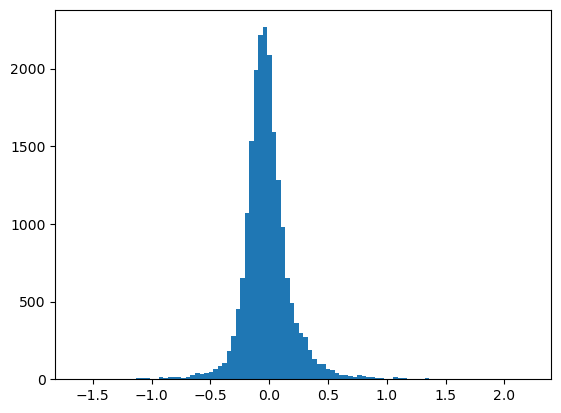

-36.428235281846355


In [285]:
x = test - test_df["FIT_Y_HIT_4"]
plt.hist(x, bins = 100)
plt.show()
print(np.median(x)*1000)

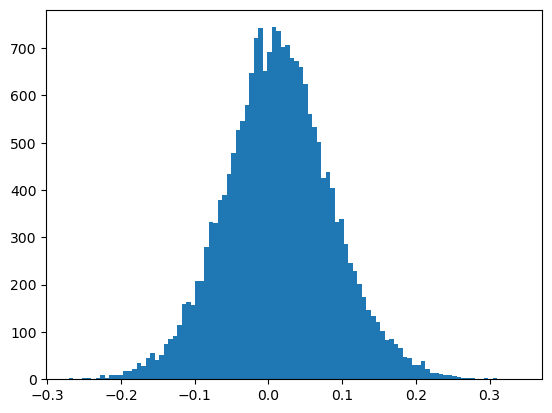

13.50296594777688
73.42512194351288


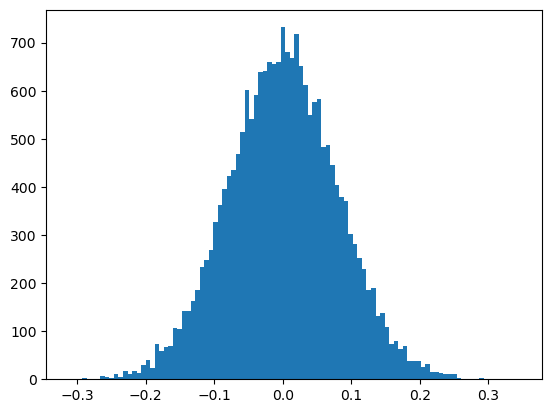

0.39448595070089454
79.95260513495724


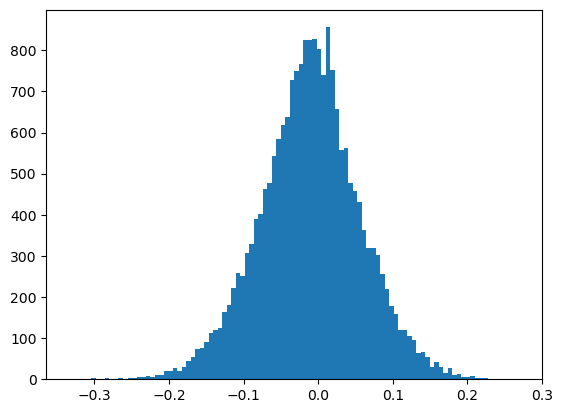

-10.70318378951444
66.94448354629054


In [69]:

x = test_df["FIT_Y_HIT_4"] - test_df["LOCAL_Y_HIT_4"]
plt.hist(x, bins = 100)
plt.show()
print(np.mean(x)*1000)
print(np.std(x)*1000)
x = test_df["FIT_Y_HIT_5"] - test_df["LOCAL_Y_HIT_5"]
plt.hist(x, bins = 100)
plt.show()
print(np.mean(x)*1000)
print(np.std(x)*1000)
x = test_df["FIT_Y_HIT_6"] - test_df["LOCAL_Y_HIT_6"]
plt.hist(x, bins = 100)
plt.show()
print(np.mean(x)*1000)
print(np.std(x)*1000)

In [166]:
truth_parameters[]

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,Q_FIT,P_TRUTH,Q_TRUTH,PX_TRUTH,PY_TRUTH,...,LOCAL_Z_HIT_2,LOCAL_Z_HIT_1,FIT_Z_HIT_6,FIT_Z_HIT_5,FIT_Z_HIT_4,FIT_Z_HIT_3,FIT_Z_HIT_2,FIT_Z_HIT_1,PX_RES,PY_RES
0,-0.006863,0.003542,1.564353,145.713089,0.938872,-1.0,145.633667,-1.0,145.629730,0.514953,...,261.376465,258.252228,325.988770,322.757324,319.526550,264.630981,261.404785,258.181122,-0.000545,-0.002340
1,-0.000896,-0.000892,1.570481,1115.506592,0.352079,-1.0,1134.860840,-1.0,1134.860352,-1.009918,...,143.739609,143.324631,146.744019,146.586533,146.429047,143.751175,143.593567,143.435852,0.017054,0.015061
2,-0.055093,-0.002877,1.559126,18.151165,0.211834,-1.0,18.160948,-1.0,18.159637,-0.052293,...,-461.976044,-467.718170,-345.029968,-350.899048,-356.780457,-456.071259,-461.912476,-467.744934,0.000539,0.001477
3,-0.001718,-0.003956,1.569512,582.097473,0.747736,-1.0,577.678711,-1.0,577.673706,-2.283606,...,207.233917,206.475876,219.827347,219.187714,218.548096,207.674438,207.034012,206.392685,-0.007649,-0.008364
4,-0.000334,0.001582,1.570215,2991.938477,1.740760,-1.0,2963.893311,-1.0,2963.889160,4.691643,...,178.281311,177.958923,184.069366,183.778641,183.487915,178.545456,178.254654,177.963806,-0.009462,-0.009021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156707,0.000846,-0.001534,1.570925,1182.384888,-0.152279,1.0,1177.087036,1.0,1177.085693,-1.810304,...,-82.333229,-82.248085,-83.536789,-83.472771,-83.408768,-82.320816,-82.256699,-82.192436,-0.004501,-0.002128
156708,0.005005,-0.001535,1.569156,199.800186,0.327751,1.0,199.140976,1.0,199.140472,-0.305185,...,-221.857971,-222.782166,-205.556473,-206.374893,-207.193466,-221.108414,-221.927460,-222.747162,-0.003310,-0.004654
156709,0.008315,-0.004394,1.577962,120.264938,-0.861820,1.0,120.028091,1.0,120.023849,-0.527432,...,-108.317223,-104.902039,-180.015320,-176.437302,-172.858749,-112.006065,-108.425323,-104.843643,-0.001973,-0.001887
156710,0.092111,-0.008958,1.583900,10.856425,-0.142253,1.0,10.875880,1.0,10.874511,-0.097390,...,156.632675,162.992249,25.049452,31.601007,38.160847,150.092148,156.588150,163.061432,0.001789,0.001482


In [170]:
print(np.mean(np.abs(truth_parameters[:,0:5,5].flatten())))
print(np.std(truth_parameters[:,0:5,5].flatten()))

0.003450102933728641
0.004625356886796597


In [195]:
happy_params = np.append(truth_parameters[:,0:5,5].flatten(), truth_parameters[:,0:2,4].flatten())

print(np.mean((happy_params))*1000)
print(np.std(happy_params)*1000)
print(np.max(np.abs(happy_params))*1000)

-0.1511456314092019
3.934756864657942
19.340891326471258


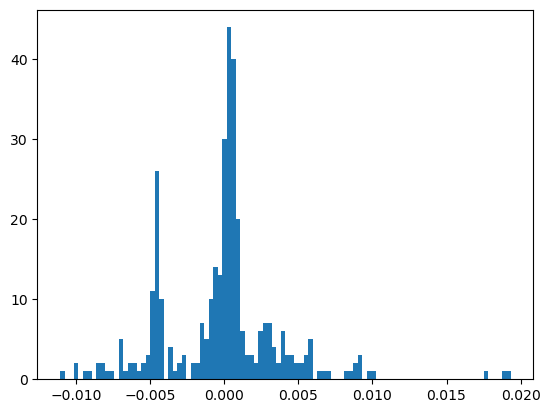

In [196]:
plt.hist(happy_params, bins = 100)
plt.show()

(array([ 3.,  2.,  0.,  1.,  2.,  3.,  7.,  9., 10.,  9., 16., 11.,  4.,
        11., 10.,  2.,  0.,  8.,  9.,  9.,  4.,  6.,  4.,  1.,  2.,  2.,
         2.,  1.,  1.,  1.]),
 array([-0.08069461, -0.07442387, -0.06815314, -0.0618824 , -0.05561167,
        -0.04934093, -0.0430702 , -0.03679946, -0.03052873, -0.02425799,
        -0.01798726, -0.01171652, -0.00544579,  0.00082495,  0.00709568,
         0.01336641,  0.01963715,  0.02590788,  0.03217862,  0.03844935,
         0.04472009,  0.05099082,  0.05726156,  0.06353229,  0.06980303,
         0.07607376,  0.0823445 ,  0.08861523,  0.09488597,  0.1011567 ,
         0.10742744]),
 <BarContainer object of 30 artists>)

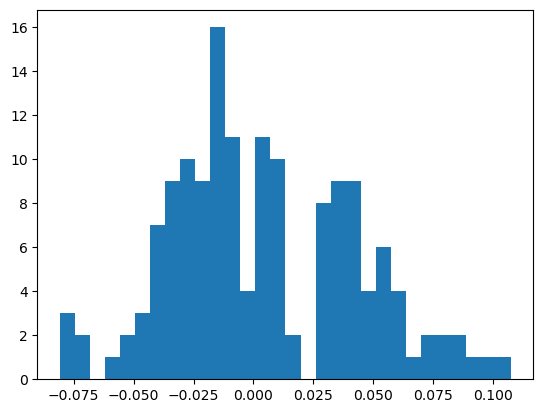

In [199]:
plt.hist(truth_parameters[:,2:5,4].flatten(), bins = 30)

In [204]:
np.std(truth_parameters[:,2:5,4].flatten())

0.03860147207812112

In [202]:
np.std(truth_parameters[:,2:5,4].flatten())

0.0698827973842435

In [358]:
np.append([0],[[1],[2]], axis =0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

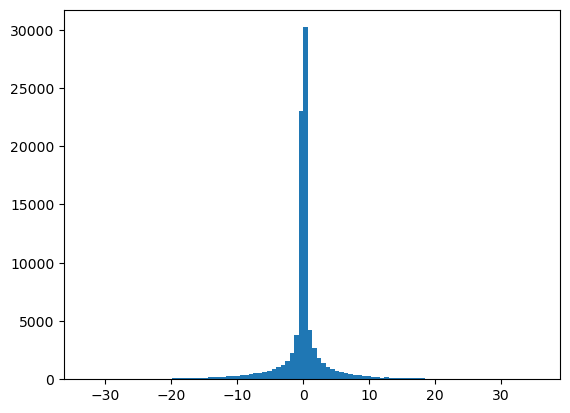

-0.08235179046049251


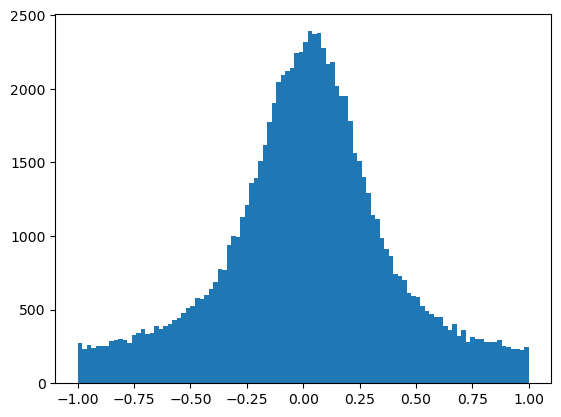

0.013978715958769344


In [251]:
plt.hist(test_df["FIT_PX_1"] - test_df["PX_TRUTH"], bins = 100)
plt.show()
print(np.mean(test_df["FIT_PX_1"] - test_df["PX_TRUTH"]))

plt.hist((test_df["FIT_PX_1"] - test_df["PX_TRUTH"])/test_df["PX_TRUTH"]*100, bins = 100)
plt.show()
print(np.mean((test_df["FIT_PX_1"] - test_df["PX_TRUTH"])/test_df["PX_TRUTH"])*100)

In [35]:
truth_parameters[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        , -0.05227112,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.05771579,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.04889774,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.07727184,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.04680343,
         0.        ]])

In [34]:
reco.Fit_Offsets(df_offsets, 4,initial_guess = np.array([0.0,0.0,0.0,0.0,0.1,-0.1]), bounds = [(0, 0),(0, 0),(0, 0),(0, 0),(-1, 1),(-1, 1)])

Optimal transformation parameters: [ 0.          0.          0.          0.         -0.04013073 -0.00011991]
Sum of squares of residuals: 244387.27661739182
Sum of squares of residuals (no transform): 247577.99466958398




(array([ 0.        ,  0.        ,  0.        ,  0.        , -0.04013073,
        -0.00011991]),
 244387.27661739182,
 247577.99466958398)